# Lab 2: Comparing Means
## w203 Statistics for Data Science

## The Data

The American National Election Studies (ANES) conducts surveys of voters in the United States.  While its flagship survey occurs every four years at the time of each presidential election, ANES also conducts pilot studies midway between these elections.  You are provided with data from the 2018 ANES Pilot Study.

An important disclaimer is that the ANES Pilot Study does not represent a random sample of the U.S. population.  Participants are taken from the YouGov panel, which is an online system in which users earn rewards for completing questionnaires.  This feature limits the extent to which results generalize to the U.S. population.

To account for differences between the YouGov panel and the U.S. Population, ANES assigns a survey weight to each observation.  This weight estimates the degree to which a citizen with certain observed characteristics is over- or under-represented in the sample.  For the purposes of this assignment, however, you are not asked to use the survey weights.  Instead, you should view your analysis as pertaining to the population of YouGov participants.  (For groups with a strong interest in survey analysis, we recommend that you read about R's [survey package](http://r-survey.r-forge.r-project.org/survey/).  We will assign a very small number of bonus points (up to 3) to any group that correctly applies the survey weights and includes a clear explanation of how these work).

For a glimpse into some of the intricacies that go into the design of this study, take a look at the introduction to the [ANES User's Guide and Codebook](https://electionstudies.org/wp-content/uploads/2019/02/anes_pilot_2018_userguidecodebook.pdf).

In [10]:
A = read.csv("anes_pilot_2018.csv")

Following is an example of a question asked on the ANES survey:

> How difficult was it for you to vote in this last election?

The variable `votehard` records answers to this question, with the following encoding:

- -1 inapplicable, legitimate skip
- 1 Not difficult at all
- 2 A little difficult
- 3 Moderately difficult
- 4 Very difficult
- 5 Extremely difficult


To see the precise form of each question, take a look at the [Questionnaire Specifications](https://electionstudies.org/wp-content/uploads/2018/12/anes_pilot_2018_questionnaire.pdf).

## Assignment

You will use the ANES dataset to address five research questions.  For each question, you will need to operationalize the concepts (selecting appropriate variables and possibly transforming them), conduct exploratory analysis, deal with non-response and other special codes, perform sanity checks, select an appropriate hypothesis test, conduct the test, and interpret your results.  When selecting a hypothesis test, you may choose from the tests covered in the async, including both paired and unpaired t-tests, as well as their nonparametric analogues.  You may select a one-tailed or two-tailed test. 

Please organize your response according to the prompts in this notebook.

Note that this is a group lab.  There is a **maximum of three students per team.** You are free to form a group of your choice amongst the students in your live section.
Although you may work on your own, we do not recommend this (we have found that individuals tend to do worse than teams on past labs).

Please limit your submission to 15 pages in total.  This means that you will have to carefully prioritize which visualizations to include.

**Hint:** When answering questions about the potential gaps between conceptual and operational definitions it is often helpful to ask yourself "If I could do anything I wanted, including borrowing Rick's portal gun, or doing an FMRI scan on all survey takers, to operationalize this particular concept how would I do it" and then explain how that is different than what is actually measured.   

## Submission Guidelines
- Submit _one_ report per group.
- Submit *both* your pdf report as well as your source file.
- **Only analyses and comments included in your PDF report will be considered for grading.**
- Include names of group members on the front page of the submitted report.
- Naming structure of submitted files:
    - PDF report: [student_surname_1]\_[student_surname_2][\_*]\_lab\_2.pdf
    - Jupyter Notebook: [student_surname_1]\_[student_surname_2][\_*]\_lab\_2.ipynb


# Research Questions

## Question 2: Are Republican voters older or younger than Democratic voters?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

We would like to compare the average age of Republican voters against the average age of Democratic voters. In order to do so, we need to determine 1) the age of the voter and 2) the political affiliation of the voter. We attempt to operationalize our variables as follows:

*Age of Voter:*
An examination of the ANES questionnaire specification indicates that there is a field called 'birthyr' that corresponds to the question 'In what year were you born?' Given that this study was conducted in December 2018, we can calculate a new variable called age by subtracting 'birthyr' from 2018. 

* Given that the survey was completed before Dec 21, 2018, there is a slight possibility that certain values for "age" may be off by a year as the participant could have been born in the remaining 10 days of the year. However, this is should not be an important distinction. 
* We can sanity check this age variable in our EDA by looking at its range. We should expect that that the minimum age is 18 given that survey participants should be 18 or older.

*Party Affiliation:*
What does it mean to be a "Republican" or "Democrat" voter? Does it depend on a voter's previous voting record? Or perhaps on party registration? Or how they describe their own political affiliation? 

* Self-described political affiliation: We believe that the self-described political affiliation, in the fields pid1d or pid1r is the best variable to use to determine with which party the voter best identifies. These fields correspond with the survey question "Generally speaking, do you usually think of yourself as a Democrat, a Republican, an
independent, or what?" However, just because the voter identifies with one party (or neither) at the time the survey was conducted in 2018 does not mean that they have always identified with this choice. Also, as political parties (and what they stand for) evolve over time, we must be careful when extrapolating this classification across time periods. Hence for the avoidance of doubt, a "Republican" voter in our study will be defined as someone who identified as "Generally speaking, thinking of themselves as a Republican in December 2018," and likewise for a Democrat voter. 

We also examined other ways to determine the political affiliation of a voter, but found them to be more ambigious and less optimal operationalizations of our variables. 

* Voting record: Entries such as 'vote16' which corresponds to the voter's choice in the 2016 presidential election, or other fields related to the 2018 elections could give us insight into each voter's record. However, just because a voter voted for a democratic candidate in 2016 or 2018 does not provide enough data points to determine them as a "democrat" voter, and we may run into difficult judgement calls if the voter voted for different parties in the two years. 

* Voter registration: The field 'vote20dem' offers us insight into whether a voter planned to participate in the 2020 democratic primaries. Primaries in the US are only open to registered voters of that party. This would give us insight into which voters have registered as Democrats, but would not give us insights into those who did not (if they are Republican, indpendent or something else).

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

**Age**
* As defined above, we compute age by subtracting birthyr from 2018.
* We note from the summary and histogram below that the range of all ages are from 18 - 91 years old, with the mean age of all survey participants as 49.5 years.
* We note that most respondents are between 20-70 years, with fewer >80. This makes sense as overall in the US population there should be less people alive and computer literate >80.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   35.00   52.00   49.48   62.00   91.00 

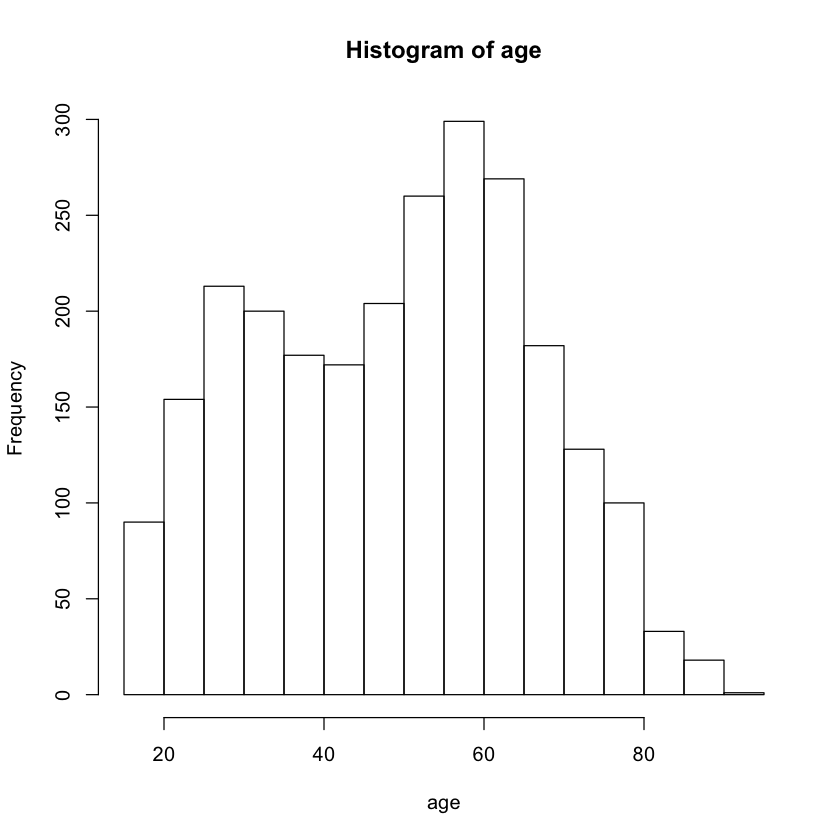

In [28]:
age<- 2018-A$birthyr
summary(age)
hist(age)

**Political Affiliation**
* Since this question had two formats, which ranked either "Democrat" or "Republican" first, we need to look at book fields "pid1d" and "pid1r". 
* We note that these fields should only contain the numbers (1-4), -1 for inapplicable and -7 for no answer. If a -4 appears, it means an error occured in the survey process. Our EDA below shows that the unique values in these fields are indeed -7,-1,[1-4]
* Participants should have only been shown either "pid1d" or "pid1r". As a result, if they record a result of 1-4 or -7 for one entry, they should shown -1 in the other field. We confirm this below. 

In [29]:
# Check for appopriate values.
unique(A$pid1d)
unique(A$pid1r)

[1]  2 -1  3  1  4 -7

[1] -1  2  3  1  4 -7

In [37]:
#Check that only 1 of pid1d/pid1r is filled by replacing -1 with 0 in both vectors.
check_1d<-replace(A$pid1d,A$pid1d==-1,0)
check_1r<-replace(A$pid1r,A$pid1r==-1,0)
# The product of the two vectors should be 0 for every entry.
check<-check_1d*check_1r
# Check that all values are 0.
summary(check)
length(check)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

[1] 2500

In [94]:
#Extract all the rows from A$pid1d that equal 1 (democrat) or 2 (republican)
library(dplyr)
# Extract relevant columbns from A.
df_1d<-select(A,birthyr,pid1d)
# Add an age column.
df_1d$age<-2018-A$birthyr
# Replace 1 and 2 with democrat and republican, respectively.
df_1d$pid1d<-replace(df_1d$pid1d,A$pid1d==1,"democrat")
df_1d$pid1d<-replace(df_1d$pid1d,A$pid1d==2,"republican")
# Filter out all other values.
df_1d<-df_1d %>% filter(pid1d == "democrat" | pid1d=="republican")
#Rename pid1d to party.
df_1d<-rename(df_1d, party = pid1d)
# Drop birth year column.
df_1d<-select(df_1d, age,party)

In [108]:
head(df_1d)
length(df_1d$age)

age,party
32,republican
61,democrat
50,democrat
31,republican
66,democrat
38,democrat


[1] 758

In [104]:
#Extract all the rows from A$pid1r that equal 1 (republican) or 2 (democrat)
# Extract relevant columbns from A.
df_1r<-select(A,birthyr,pid1r)
# Add an age column.
df_1r$age<-2018-A$birthyr
# Replace 1 and 2 with democrat and republican, respectively.
df_1r$pid1r<-replace(df_1r$pid1r,A$pid1r==1,"republican")
df_1r$pid1r<-replace(df_1r$pid1r,A$pid1r==2,"democrat")
# Filter out all other values.
df_1r<-df_1r %>% filter(pid1r == "democrat" | pid1r=="republican")
#Rename pid1r to party.
df_1r<-rename(df_1r, party = pid1r)
# Drop birth year column.
df_1r<-select(df_1r, age,party)

In [107]:
head(df_1r)
length(df_1r$age)

age,party
46,democrat
29,democrat
26,republican
56,democrat
40,democrat
67,democrat


[1] 708

In [110]:
# Combine both tables
age_df<-rbind(df_1d,df_1r)
head(age_df)
length(age_df$age)

age,party
32,republican
61,democrat
50,democrat
31,republican
66,democrat
38,democrat


[1] 1466

In [118]:
rep<-filter(age_df,party=="republican")
dem<-filter(age_df,party=="democrat")
length(rep$party)
length(dem$party)

[1] 751

[1] 715

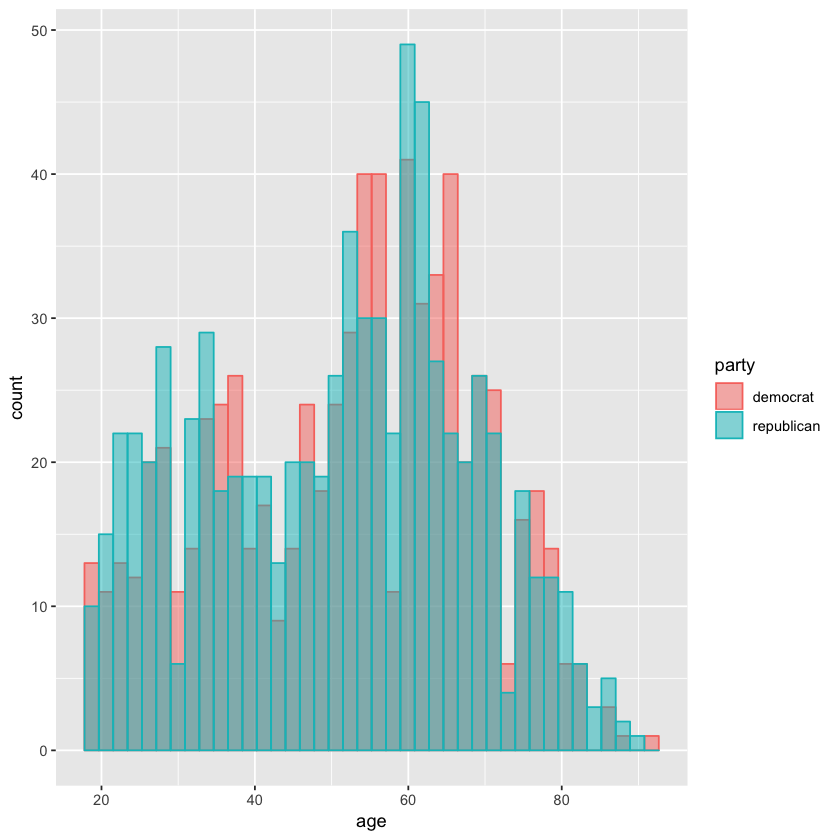

In [113]:
# Create a histogram.
library("ggplot2")
ggplot(age_df, aes(x=age, color=party, fill=party)) +
  geom_histogram(position="identity", alpha=0.5, bins =40)

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice, focusing on its statistical assumptions.

We will use an Independent T-Test to determine if there is a statistically significant difference between the means in two unrelated groups. 
* Our null hypothesis, is $H_0:$ There are no difference between the mean age of democrat and republican voters. 
* The alternative hypothes is $H_A$: The mean age of repbulican voters are greater or less than the mean of democrat voters. 

We believe an indpendent T-test is the most appropriate choice because:

* There are two groups for our independent variable and the groups are different people.
* Both groups appear to be fairly normally distributed from the histogram above.
* The draws should be iid, given the survey methodology? [to elaborate].
* Homogenity of variance. 

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

## Question 3: Do a majority of independent voters believe that the federal investigations of Russian election interference are baseless?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice, focusing on its statistical assumptions.

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

## Question 5: Select a fifth question that you believe is important for understanding the behavior of voters

### Clearly argue for the relevance of this question.  (10 points)
In words, clearly state your research question and argue why it is important for understanding the recent voting behavior. Explain it as if you were presenting to an audience that includes technical and non technical members.

Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

### Perform EDA and select your hypothesis test (5 points)

Perform an exploratory data analysis (EDA) of the relevant variables.

This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

Based on your EDA, select an appropriate hypothesis test.
Explain why your test is the most appropriate choice, focusing on its statistical assumptions.

### Conduct your test. (2 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.

### Conclusion (3 points)
Clearly state the conclusion of your hypothesis test and how it relates to your research question.

Finally, briefly present your conclusion in words as if you were presenting to an audience that includes technical and non technical members.